This notebook uses curve_fit and initial estimated values to calculate the Y0, plateau and rate constant values to find a model to explain data generated from a protein standard curve using the Bradford assay.  Using SciPy's curve_fit makes GraphPad plotting unnecessary.

In [106]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from scipy import stats

Import raw data:

In [107]:
xdata = [2000, 1500, 1000, 750, 500, 250, 125, 25]
ydata = [1.07685, 0.9741, 0.8432, 0.74875, 0.4937, 0.2928, 0.1696, 0.02865]

The initial guesses are important. Without them, curve_fit can't coalesce around explanatory values. I wonder how to generate values without human input. Y0 can be zero. The plateau could be Max + a few units. K, the rate, is difficult to estimate. When too high, incomputable values are generated (0's). Initial guesses could be more accurate by taking into account constraints e.g. p != Y0 and k !=0. 

R2 = 0.9159759228396054


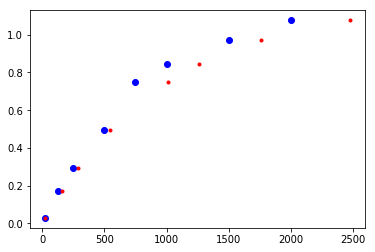

In [138]:
# an array for initial guesses
# g = [y0, P, k]

# when k < 0.002 then no errors
# when k > 0.002 then log(0) = errors

g = [0, 1.176, 0.001]

def eqn(y, y0, P, k):
    '=(LN(($D$76-$D$75)/($D$76-G76))+0)/$D$77'
    return (np.log((P-y0)/(P-y)))/k

conc_pred = np.empty(len(ydata))
for i in range(len(ydata)):
    conc_pred[i]=eqn(ydata[i], g[0], g[1], g[2])
    
plt.plot(xdata, ydata, 'bo', label='data')
plt.plot(conc_pred, ydata, 'r.', label='predicted')
from sklearn.metrics import r2_score
print ("R2 =", r2_score(conc_pred, xdata))

When predicted line (red) is below observed (blue) line, then no error in curve_fit. When above observed line, then errors about "...invalid value encountered in log." i.d. log(0).

In [139]:
c,cov = curve_fit(eqn, ydata, xdata, g)
c

array([-0.01206484,  1.17394043,  0.00124237])

Text(1500,0.5,'0.9958475153055671')

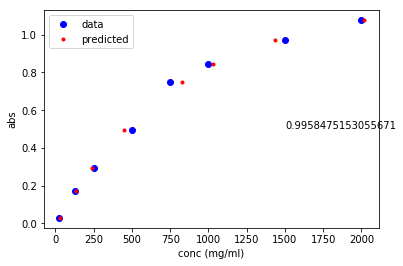

In [129]:
conc = np.empty(len(ydata))

for i in range(len(ydata)):
    conc[i]=eqn(ydata[i], c[0], c[1], c[2])
    
plt.plot(xdata, ydata, 'bo', label='data')
plt.plot(conc, ydata, 'r.', label='predicted')
plt.xlabel('conc (mg/ml)')
plt.ylabel('abs')
plt.legend()
r_squared = r2_score(conc, xdata)
plt.text(1500, 0.5, r_squared) #'R-squared = %' % r_squared)